Impport Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap

Import the dataset

In [2]:
data = pd.read_csv('Social_Network_Ads.csv')
print(data)

     Age  EstimatedSalary  Purchased
0     19            19000          0
1     35            20000          0
2     26            43000          0
3     27            57000          0
4     19            76000          0
..   ...              ...        ...
395   46            41000          1
396   51            23000          1
397   50            20000          1
398   36            33000          0
399   49            36000          1

[400 rows x 3 columns]


In [3]:
x = data.iloc[:, :-1].values
y = data.iloc[:, -1].values

Split the dataset into training ans test sets

In [6]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 0)

Feature Scaling

In [7]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
x_train = sc.fit_transform(x_train)
x_test = sc.transform(x_test)

Train the naive Bayes model on the training set

In [8]:
from sklearn.naive_bayes import GaussianNB
gnb = GaussianNB()
gnb.fit(x_train, y_train)

GaussianNB()

Predict new result

In [9]:
print(gnb.predict(sc.transform([[30, 87000]])))

[0]


Predict the test set result

In [11]:
y_pred = gnb.predict(x_test)
print(np.concatenate((y_pred.reshape(len(y_pred), 1), y_test.reshape(len(y_test), 1)), 1))

[[0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [1 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [1 0]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [1 1]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 1]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [1 1]
 [1 1]
 [0 0]
 [0 0]
 [1 0]
 [1 1]
 [0 1]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [0 1]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [0 1]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [1 1]]


Make the confusion matrix

In [12]:
from sklearn.metrics import confusion_matrix, accuracy_score
cm = confusion_matrix(y_test, y_pred)
print(cm)
accuracy_score(y_test, y_pred)

[[55  3]
 [ 4 18]]


0.9125

Visualizing the training set result

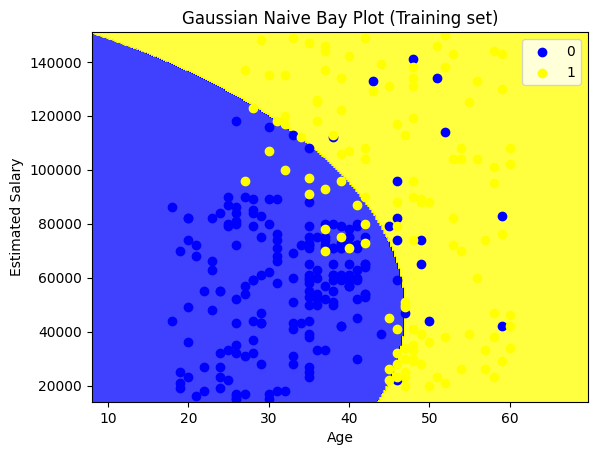

In [16]:
# Visualizing the train set data
x_set = sc.inverse_transform(x_train)
y_set = y_train
x1, x2 = np.meshgrid(
    np.arange(start = x_set[:, 0].min() - 10, stop = x_set[:, 0].max() + 10, step = 0.25),
    np.arange(start = x_set[:, 1].min() - 1000, stop = x_set[:, 1].max() + 1000, step = 0.25)
)

# Predict the results of the trainin set
z = gnb.predict(sc.transform(np.array([x1.ravel(), x2.ravel()]).T)).reshape(x1.shape)

# Create the chat for the training set result
plt.contourf(x1, x2, z, alpha = 0.75, cmap = ListedColormap(('blue', 'yellow')))
plt.xlim(x1.min(), x1.max())
plt.ylim(x2.min(), x2.max())

# Plot the Gaussian Naive Bayes plot for the training set
Colors = ListedColormap(('blue', 'yellow'))

for i, j in enumerate(np.unique(y_set)):
    plt.scatter(x_set[y_set == j, 0], x_set[y_set == j, 1], color = Colors(i), label = j)

plt.title('Gaussian Naive Bay Plot (Training set)')
plt.xlabel('Age')
plt.ylabel('Estimated Salary')
plt.legend()
plt.show()

Visualizing the test set result

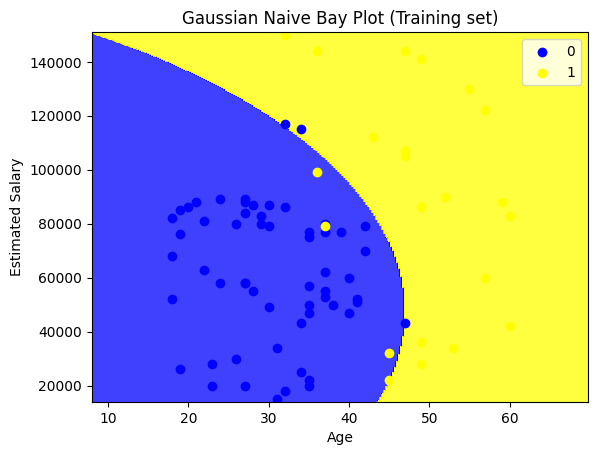

In [17]:
# Visualizing the train set data
x_set = sc.inverse_transform(x_test)
y_set = y_test
x1, x2 = np.meshgrid(
    np.arange(start = x_set[:, 0].min() - 10, stop = x_set[:, 0].max() + 10, step = 0.25),
    np.arange(start = x_set[:, 1].min() - 1000, stop = x_set[:, 1].max() + 1000, step = 0.25)
)

# Predict the results of the trainin set
z = gnb.predict(sc.transform(np.array([x1.ravel(), x2.ravel()]).T)).reshape(x1.shape)

# Create the chat for the training set result
plt.contourf(x1, x2, z, alpha = 0.75, cmap = ListedColormap(('blue', 'yellow')))
plt.xlim(x1.min(), x1.max())
plt.ylim(x2.min(), x2.max())

# Plot the Gaussian Naive Bayes plot for the training set
Colors = ListedColormap(('blue', 'yellow'))

for i, j in enumerate(np.unique(y_set)):
    plt.scatter(x_set[y_set == j, 0], x_set[y_set == j, 1], color = Colors(i), label = j)

plt.title('Gaussian Naive Bay Plot (Training set)')
plt.xlabel('Age')
plt.ylabel('Estimated Salary')
plt.legend()
plt.show()